In [23]:
import tifffile
import cv2
from image_preprocessing import black_to_transparent, overlay_transparent
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 300

In [16]:
tif = tifffile.imread("geotiffs/tier3/images/joplin-tornado_00000000_post_disaster.tif").astype(np.uint8)
mask_nodamage = cv2.imread("geotiffs/tier3/masks/joplin-tornado_00000000_post_disaster_mask-nodamage.png")
mask_minordamage = cv2.imread("geotiffs/tier3/masks/joplin-tornado_00000000_post_disaster_mask-minordamage.png")
mask_majordamage = cv2.imread("geotiffs/tier3/masks/joplin-tornado_00000000_post_disaster_mask-majordamage.png")
mask_destroyed = cv2.imread("geotiffs/tier3/masks/joplin-tornado_00000000_post_disaster_mask-destoryed.png")

In [50]:
mask_nodamage_tp = black_to_transparent(mask_nodamage)
mask_minordamage_tp = black_to_transparent(mask_minordamage)
mask_majordamage_tp = black_to_transparent(mask_majordamage)
mask_destroyed_tp = black_to_transparent(mask_destroyed)

In [51]:
mask_nodamage_tp[np.all(mask_nodamage_tp > (0,0,0,0), axis=-1)] = (83,27,66,55)

mask_minordamage_tp[np.all(mask_minordamage_tp > (0,0,0,0), axis=-1)] = (143,104,48,55)

mask_majordamage_tp[np.all(mask_majordamage_tp > (0,0,0,0), axis=-1)] = (120,183,52,55)

mask_destroyed_tp[np.all(mask_destroyed_tp > (0,0,0,0), axis=-1)] = (255,0,0,55)

In [52]:
result = overlay_transparent(tif, mask_destroyed_tp)
result = overlay_transparent(result, mask_minordamage_tp)
result = overlay_transparent(result, mask_majordamage_tp)
result = overlay_transparent(result, mask_nodamage_tp)

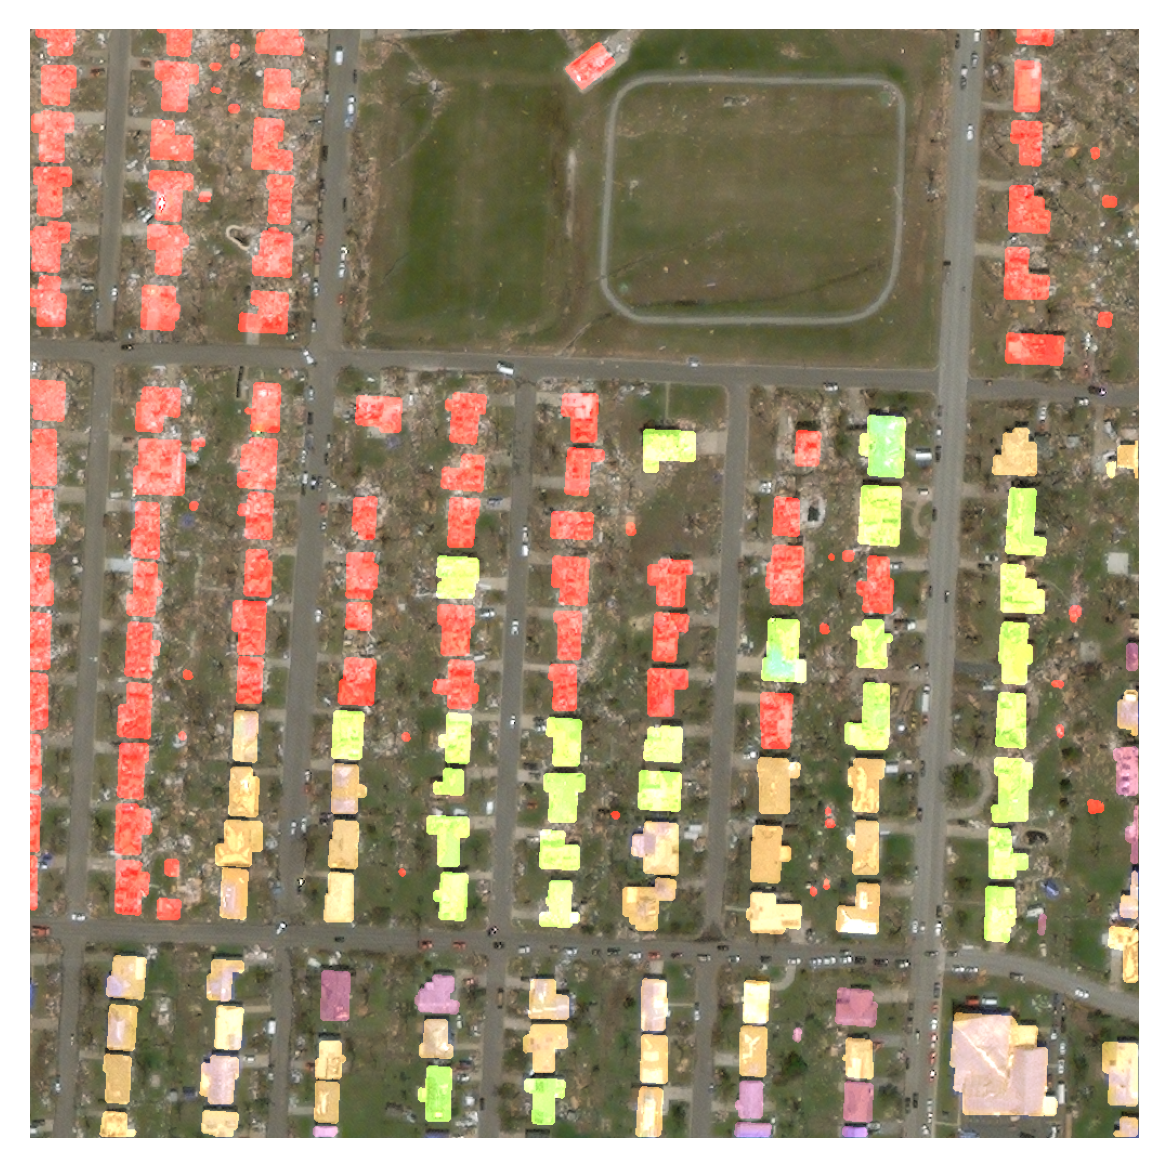

In [53]:
plt.imshow(result)
plt.axis("off");